# **Simple Autoencoder using Keras**

I followed this tutorial when learning to build autoencoders with Keras: https://blog.keras.io/building-autoencoders-in-keras.html

**Autoencoding** 
- a data compression algorithm where the compression and decompression functions are: 
  1. data-specific
  2. lossy
  3. learned automatically from examples rather than engineered by a human

**1. Data-specific**
- only be able to compress data similar to what they have been trained on
- Example: An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees. It has learned the specific features of faces

**2. Lossy**
- decompressed outputs will be degraded compared to the original inputs

**3. Learned automatically from examples**
-  easy to train specialized instances of the algorithm that will perform well on a specific type of input




## **Building an autoencoder:**
1. an encoding function
2. a decoding function
3. a loss function - a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation

## **Simple Autoencoder**

**A single fully-connected neural layer as encoder and as decoder**

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

**Separate Encoder Model**

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

**The Decoder Model**

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3809 - val_loss: 0.1939
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1827 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1494 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1312 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1201 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1130 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1077 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1034 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1004 - val_loss: 0.0975


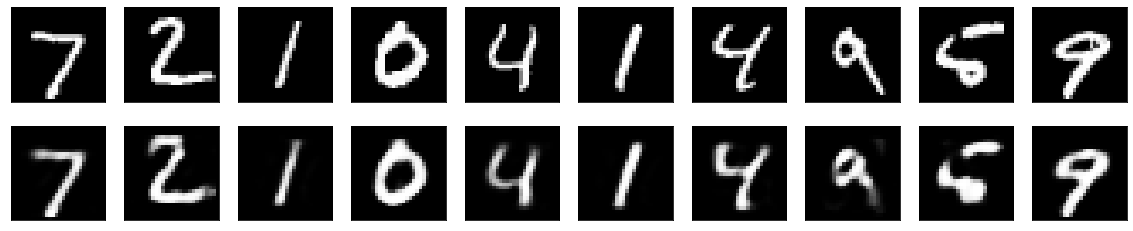

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Adding a sparsity constraint on the encoded representations**

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.3911 - val_loss: 0.1964
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1875 - val_loss: 0.1608
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1566 - val_loss: 0.1421
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1403 - val_loss: 0.1311
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1304 - val_loss: 0.1240
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1240 - val_loss: 0.1186
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1188 - val_loss: 0.1146
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1153 - val_loss: 0.1116
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1122 - val_loss: 0.1093
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1103 - val_lo

## **Deep Autoencoder**

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.3278 - val_loss: 0.1609
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1523 - val_loss: 0.1326
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1309 - val_loss: 0.1217
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1196 - val_loss: 0.1122
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1124 - val_loss: 0.1082
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1082 - val_loss: 0.1045
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1049 - val_loss: 0.1016
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1021 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0997 - val_loss: 0.0977
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0981 - val_lo

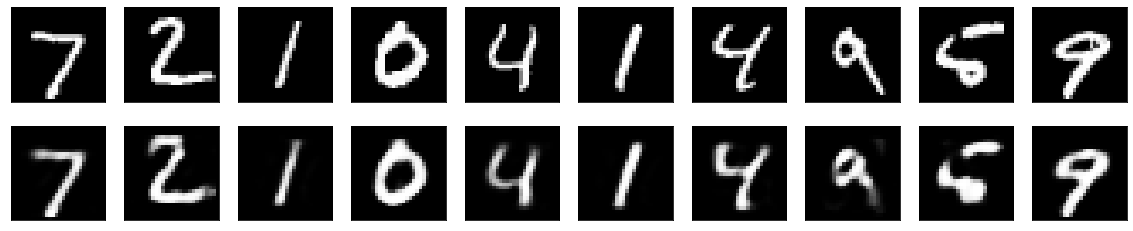

In [ ]:
n = 10  # How many digits we will display
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Convolutional autoencoder**

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 83s 175ms/step - loss: 0.3198 - val_loss: 0.1441
Epoch 2/50
469/469 [==============================] - 82s 176ms/step - loss: 0.1401 - val_loss: 0.1269
Epoch 3/50
469/469 [==============================] - 83s 177ms/step - loss: 0.1249 - val_loss: 0.1186
Epoch 4/50
469/469 [==============================] - 82s 175ms/step - loss: 0.1181 - val_loss: 0.1135
Epoch 5/50
469/469 [==============================] - 82s 174ms/step - loss: 0.1137 - val_loss: 0.1116
Epoch 6/50
469/469 [==============================] - 82s 175ms/step - loss: 0.1108 - val_loss: 0.1075
Epoch 7/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1082 - val_loss: 0.1053
Epoch 8/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1060 - val_loss: 0.1038
Epoch 9/50
469/469 [==============================] - 82s 174ms/step - loss: 0.1046 - val_loss: 0.1021
Epoch 10/50
469/469 [==============================] - 82s 175ms/step - l

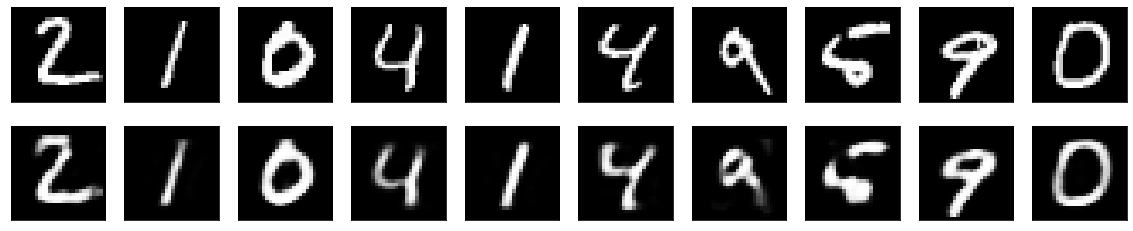

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

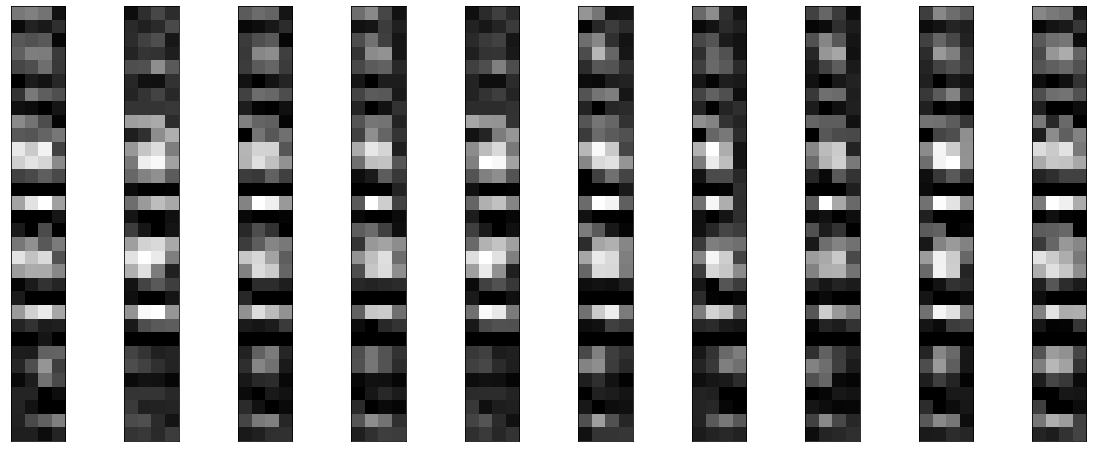

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Image Denoising**

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

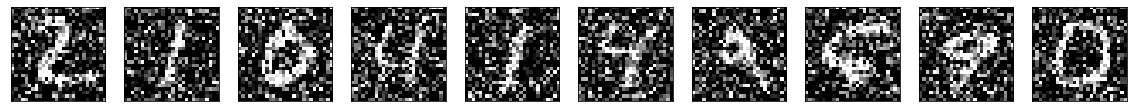

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 148s 315ms/step - loss: 0.2393 - val_loss: 0.1168
Epoch 2/100
469/469 [==============================] - 149s 317ms/step - loss: 0.1154 - val_loss: 0.1080
Epoch 3/100
469/469 [==============================] - 148s 315ms/step - loss: 0.1082 - val_loss: 0.1046
Epoch 4/100
469/469 [==============================] - 148s 315ms/step - loss: 0.1051 - val_loss: 0.1025
Epoch 5/100
469/469 [==============================] - 148s 316ms/step - loss: 0.1030 - val_loss: 0.1019
Epoch 6/100
469/469 [==============================] - 148s 316ms/step - loss: 0.1017 - val_loss: 0.0999
Epoch 7/100
469/469 [==============================] - 152s 324ms/step - loss: 0.1004 - val_loss: 0.0989
Epoch 8/100
469/469 [==============================] - 148s 316ms/step - loss: 0.0994 - val_loss: 0.0984
Epoch 9/100
469/469 [==============================] - 148s 315ms/step - loss: 0.0988 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] -

## **Variational Autoencoder (VAE)**

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np

original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.3515 - val_loss: 147.1835
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.2899 - val_loss: 146.9701
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.2712 - val_loss: 147.0136
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.2421 - val_loss: 146.9775
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.2033 - val_loss: 147.1057
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.1806 - val_loss: 147.0045
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.1642 - val_loss: 147.0001
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 144.1214 - val_loss: 146.7103
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 144.1185 - val_loss: 146.9792
Epoch 10/100
1875/1875 [=============

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

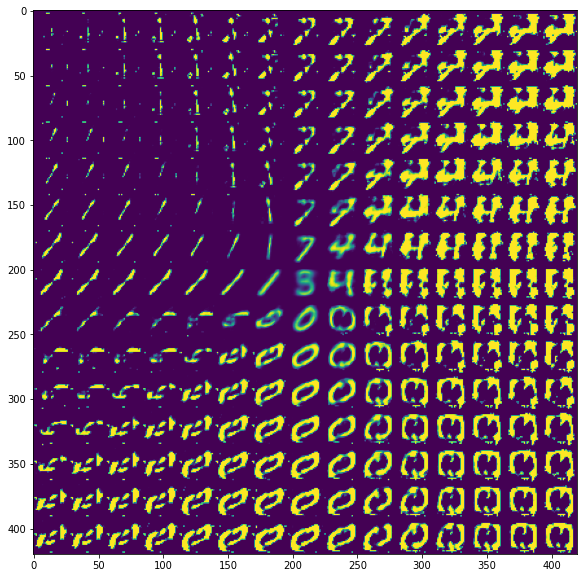

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.show()

plt.figure(figsize=(6, 6))
plt.show()
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()